In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', 'No data for colormapping provided via', UserWarning)

In [3]:
import pandas as pd

def sort_categories(adata, column):
    categories = pd.Series(adata.obs[column].unique(), dtype='str')
    df = categories.str.extract('(\D)(\d+\.\d+)(_.*)')
    df.columns = ['letter', 'number', 'suffix']
    df['number'] = df['number'].astype(float)
    cat_type = pd.CategoricalDtype(categories=['B', 'L', 'T', 'S'], ordered=True)
    df['letter'] = df['letter'].astype(cat_type)
    df.sort_values(by=['letter', 'number'], inplace=True)
    df['sorted_category'] = df.apply(lambda row: row['letter'] + str(row['number']) + row['suffix'], axis=1)
    sorted_categories = df['sorted_category']
    adata.obs[column] = pd.Categorical(adata.obs[column], categories=sorted_categories, ordered=True)
    return adata

In [4]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [5]:
adata1

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
adata1=sort_categories(adata1,'AdjustedID')

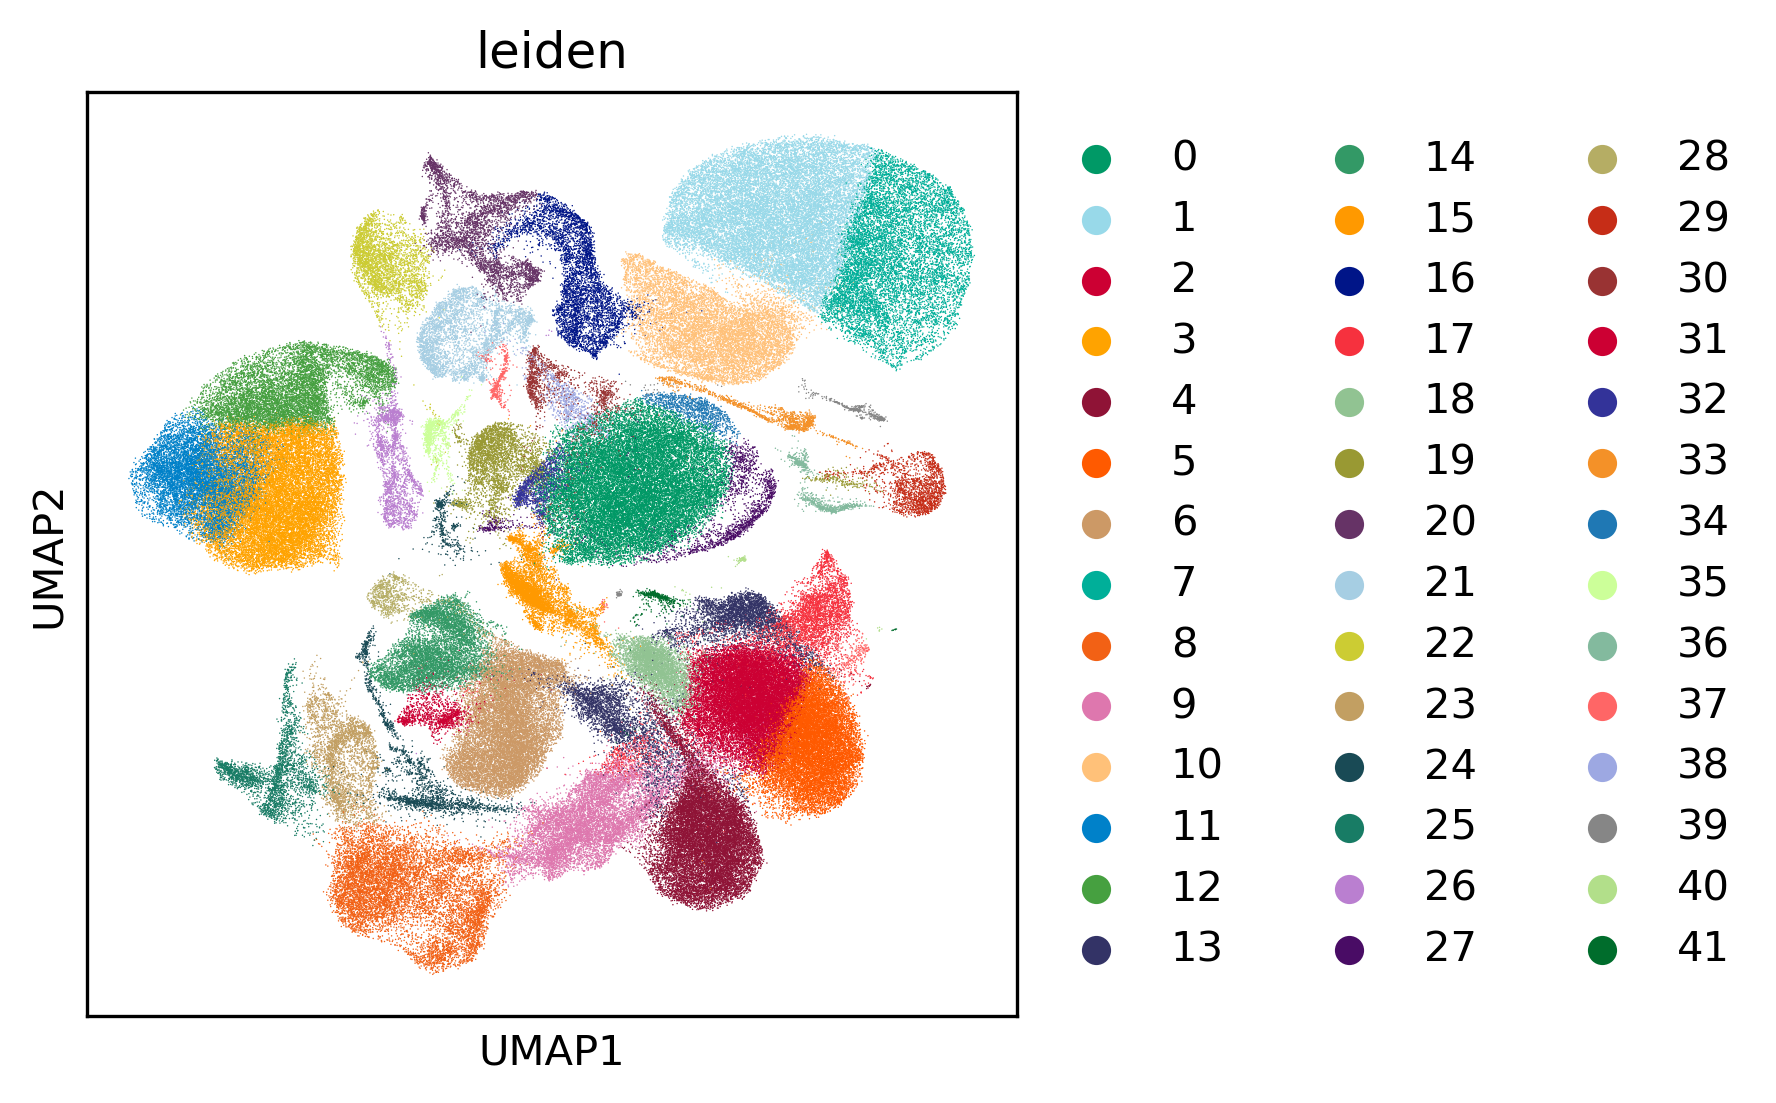

In [7]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 300
sc.pl.umap(adata1, color='leiden')

In [51]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
    tmp,
    groups=tmp.obs[clust].cat.categories[1:].values,
    color=adata.obs[clust_key].cat.categories.tolist(),
    size=size,
    frameon=frameon,
    legend_loc=legend_loc,
    show=False,
        ncols=5,
#     save='S3_each_sample.png',  
    **kwargs
    
)
#     return tmp

In [70]:
def cluster_small_multiples2data(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = [1, 1]
    plt.rcParams['figure.dpi'] = 200

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
    return tmp

In [71]:
C2data=cluster_small_multiples2data(adata1,'AdjustedID',size=2)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")

In [81]:
C2data.obs.AdjustedID.unique

<bound method Series.unique of Cellname
Z48_AAACCTGAGATAGGAG-1      B17.4_P3
Z48_AAACCTGAGGCACATG-1      B17.4_P3
Z48_AAACCTGAGGTGCAAC-1      B17.4_P3
Z48_AAACCTGCAAGAGTCG-1      B17.4_P3
Z48_AAACCTGCACACCGAC-1      B17.4_P3
                             ...    
Z123_TTTGTCATCGCAAGCC-1    B22.4_P23
Z123_TTTGTCATCTAACTCT-1    B22.4_P23
Z123_TTTGTCATCTACTTAC-1    B22.4_P23
Z123_TTTGTCATCTCCCTGA-1    B22.4_P23
Z123_TTTGTCATCTGGTGTA-1    B22.4_P23
Name: AdjustedID, Length: 245834, dtype: category
Categories (32, object): ['B11.6_P24' < 'B12.0_P2' < 'B17.4_P3' < 'B18.0_P4' ... 'T18.6_P5' < 'T24.6_P11' < 'S18.6_P5' < 'S24.6_P11']>

In [88]:
# adata1.obs["AdjustedID"].cat.categories.tolist()

In [77]:
 [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith('S')]

['S18.6_P5', 'S24.6_P11']

In [82]:
C2data

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'B11.6_P24', 'B12.0_P2', 'B17.4_P3', 'B18.0_P4', 'B18.6_P5', 'B20.9_P7', 'B21.7_P8', 'B22.4_P9', 'B22.4_P23', 'B23.4_P10', 'B24.6_P11', 'B26.9_P12', 'B29.1_P13', 'B30.4_P14', 'B31.3_P15', 'B32.4_P16', 'B33.3_P17', 'B34.1_P18', 'B36.1_P19', 'B37.9_P20', 'B38.1_P21', 'B39.1_P22', 'L10.0_P1', 'L10.1_P25', 'L18.6_P5', 'L24.6_P11', 'T10.0_P1', 'T10.1_P25', 'T18.6_P5', 'T24.6_P11', 'S18.6_P5', 'S24.6_P11'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_ce

In [87]:
C2data.obs["S18.6_P5"].unique()

[False, True]
Categories (2, bool): [False, True]

[<Axes: title={'center': 'B11.6_P24'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B12.0_P2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B17.4_P3'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B18.0_P4'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B18.6_P5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B20.9_P7'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B21.7_P8'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B22.4_P9'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B22.4_P23'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B23.4_P10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B24.6_P11'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B26.9_P12'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B29.1_P13'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'B30.4_P14'}, xlabel='UMAP1', ylabel='UMAP2'>,

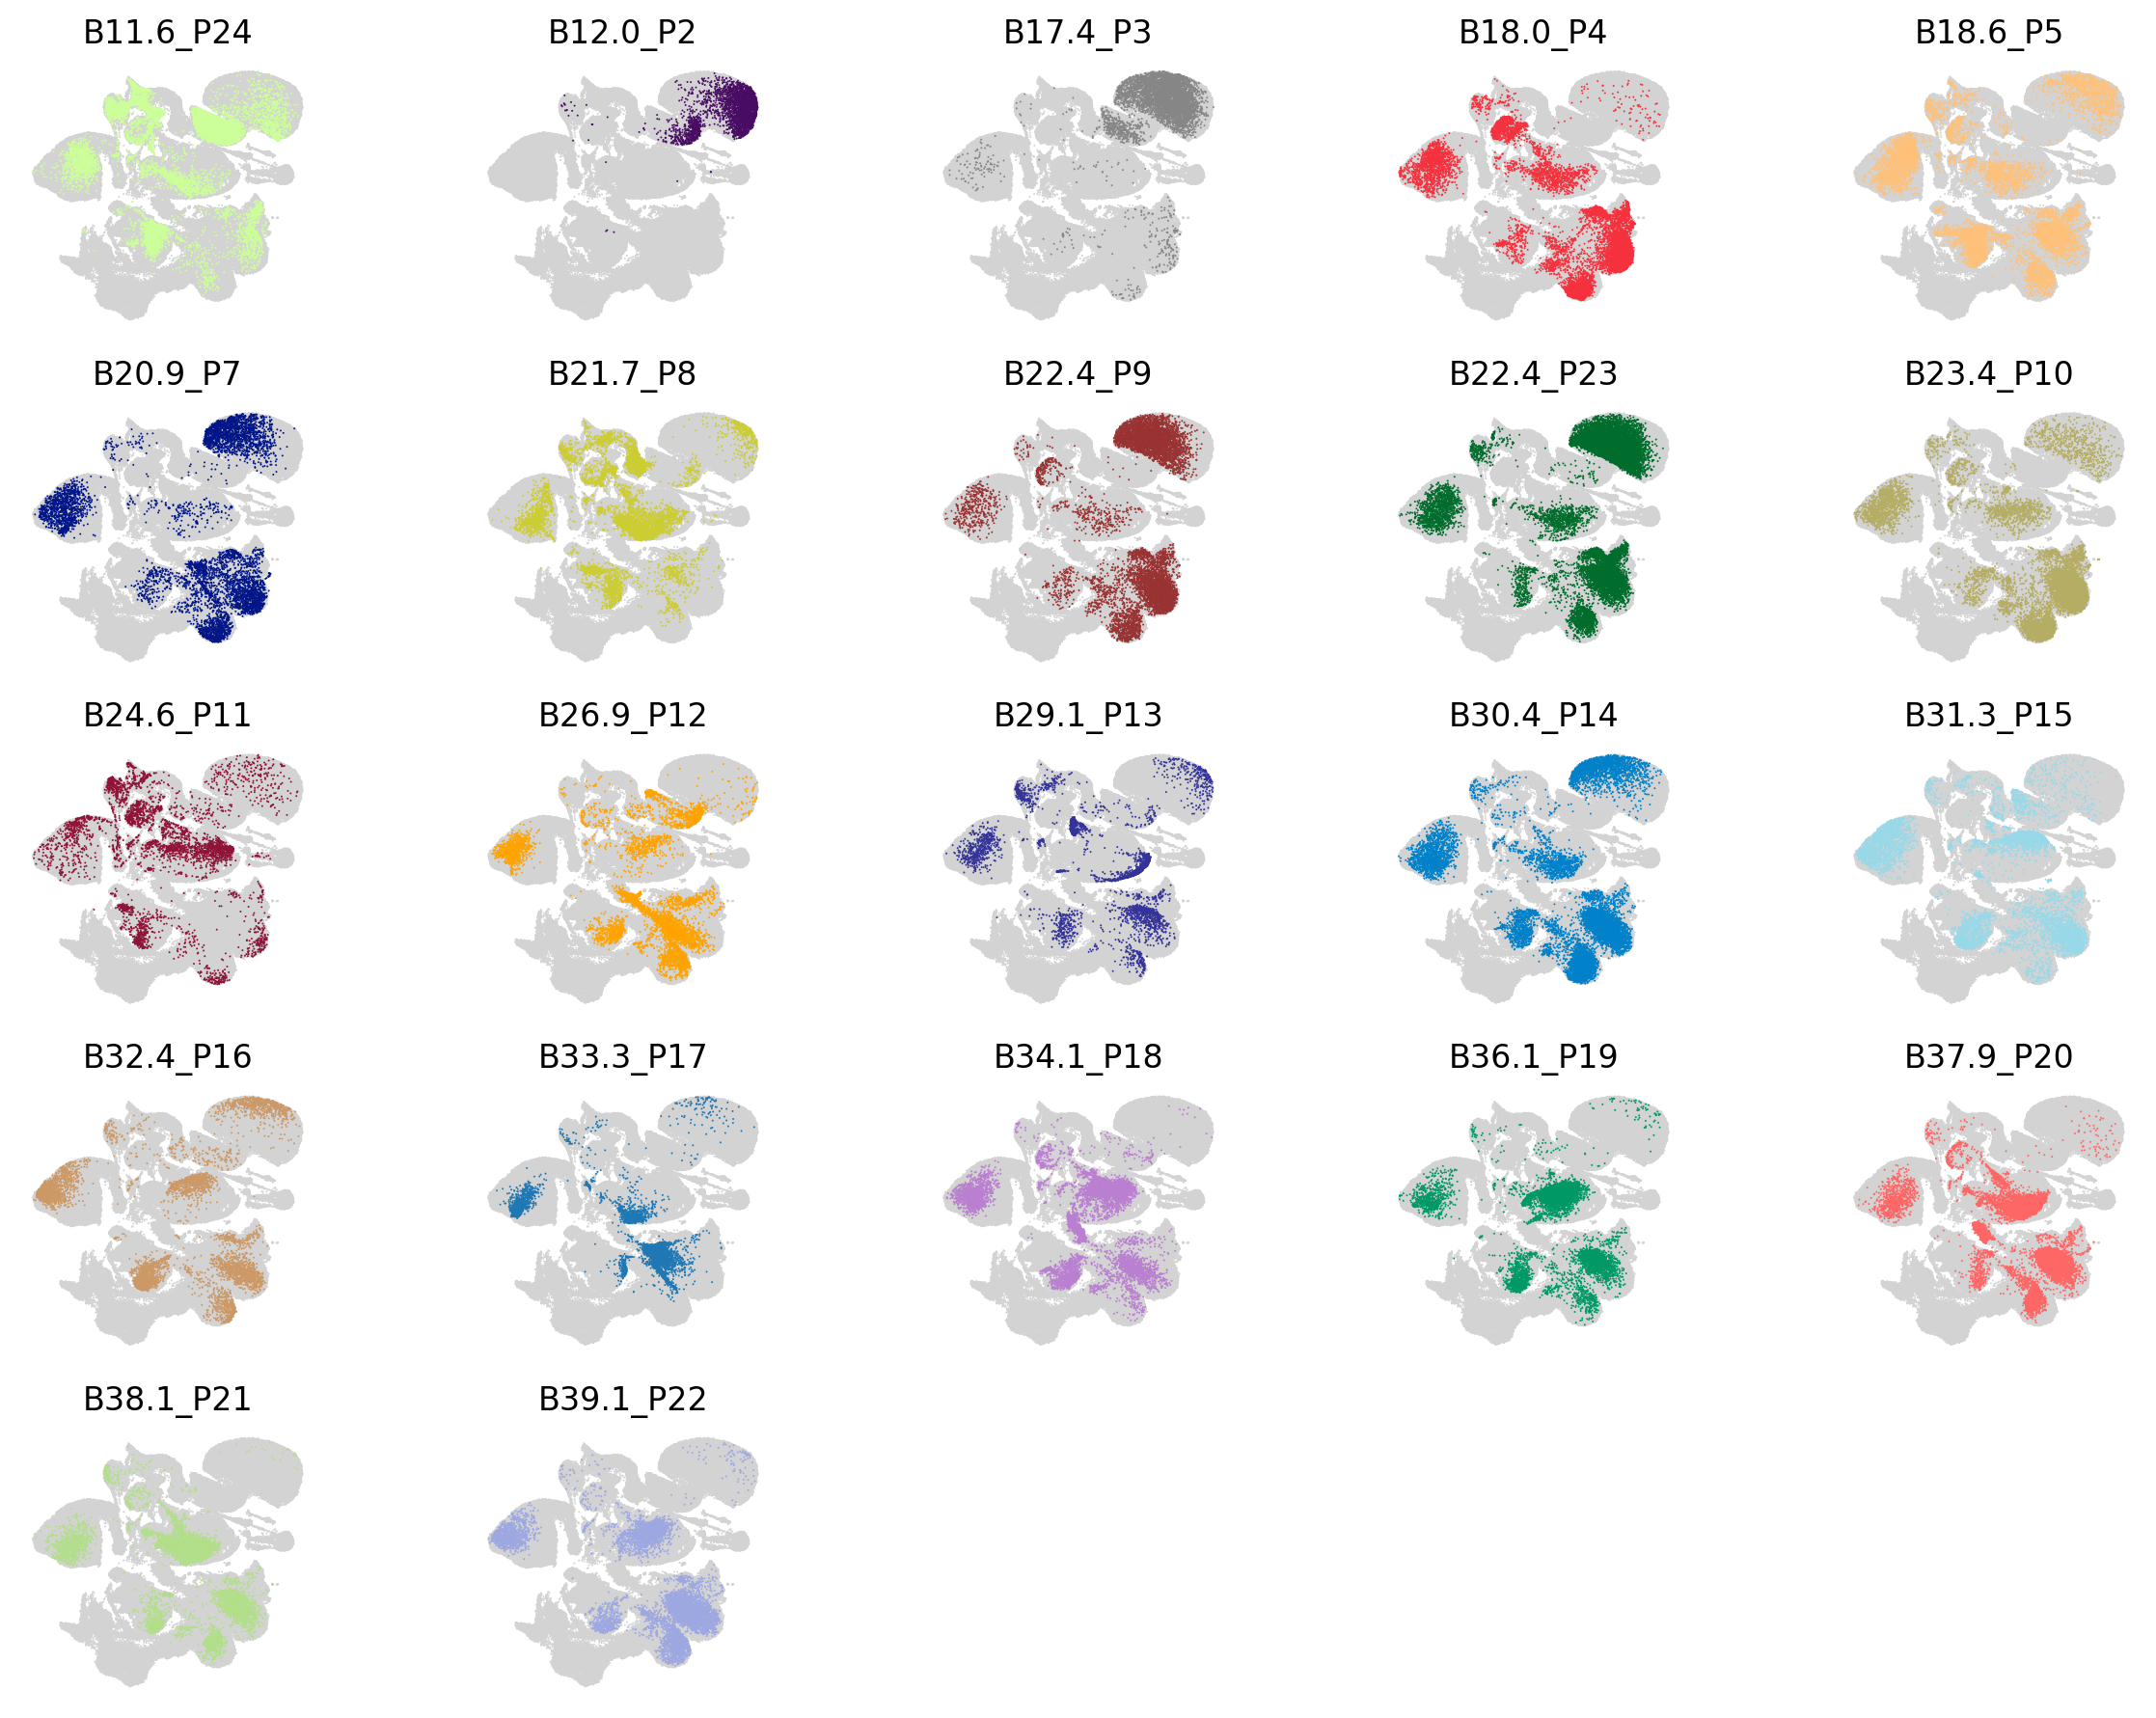

In [100]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(
    C2data,
    groups= [True],
    color=  [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith('B')],
    size=2,
    frameon=False,
    legend_loc=None,
    show=False,
        ncols=5,
#     **kwargs
#     save='S3_each_sample.png',  

    
)

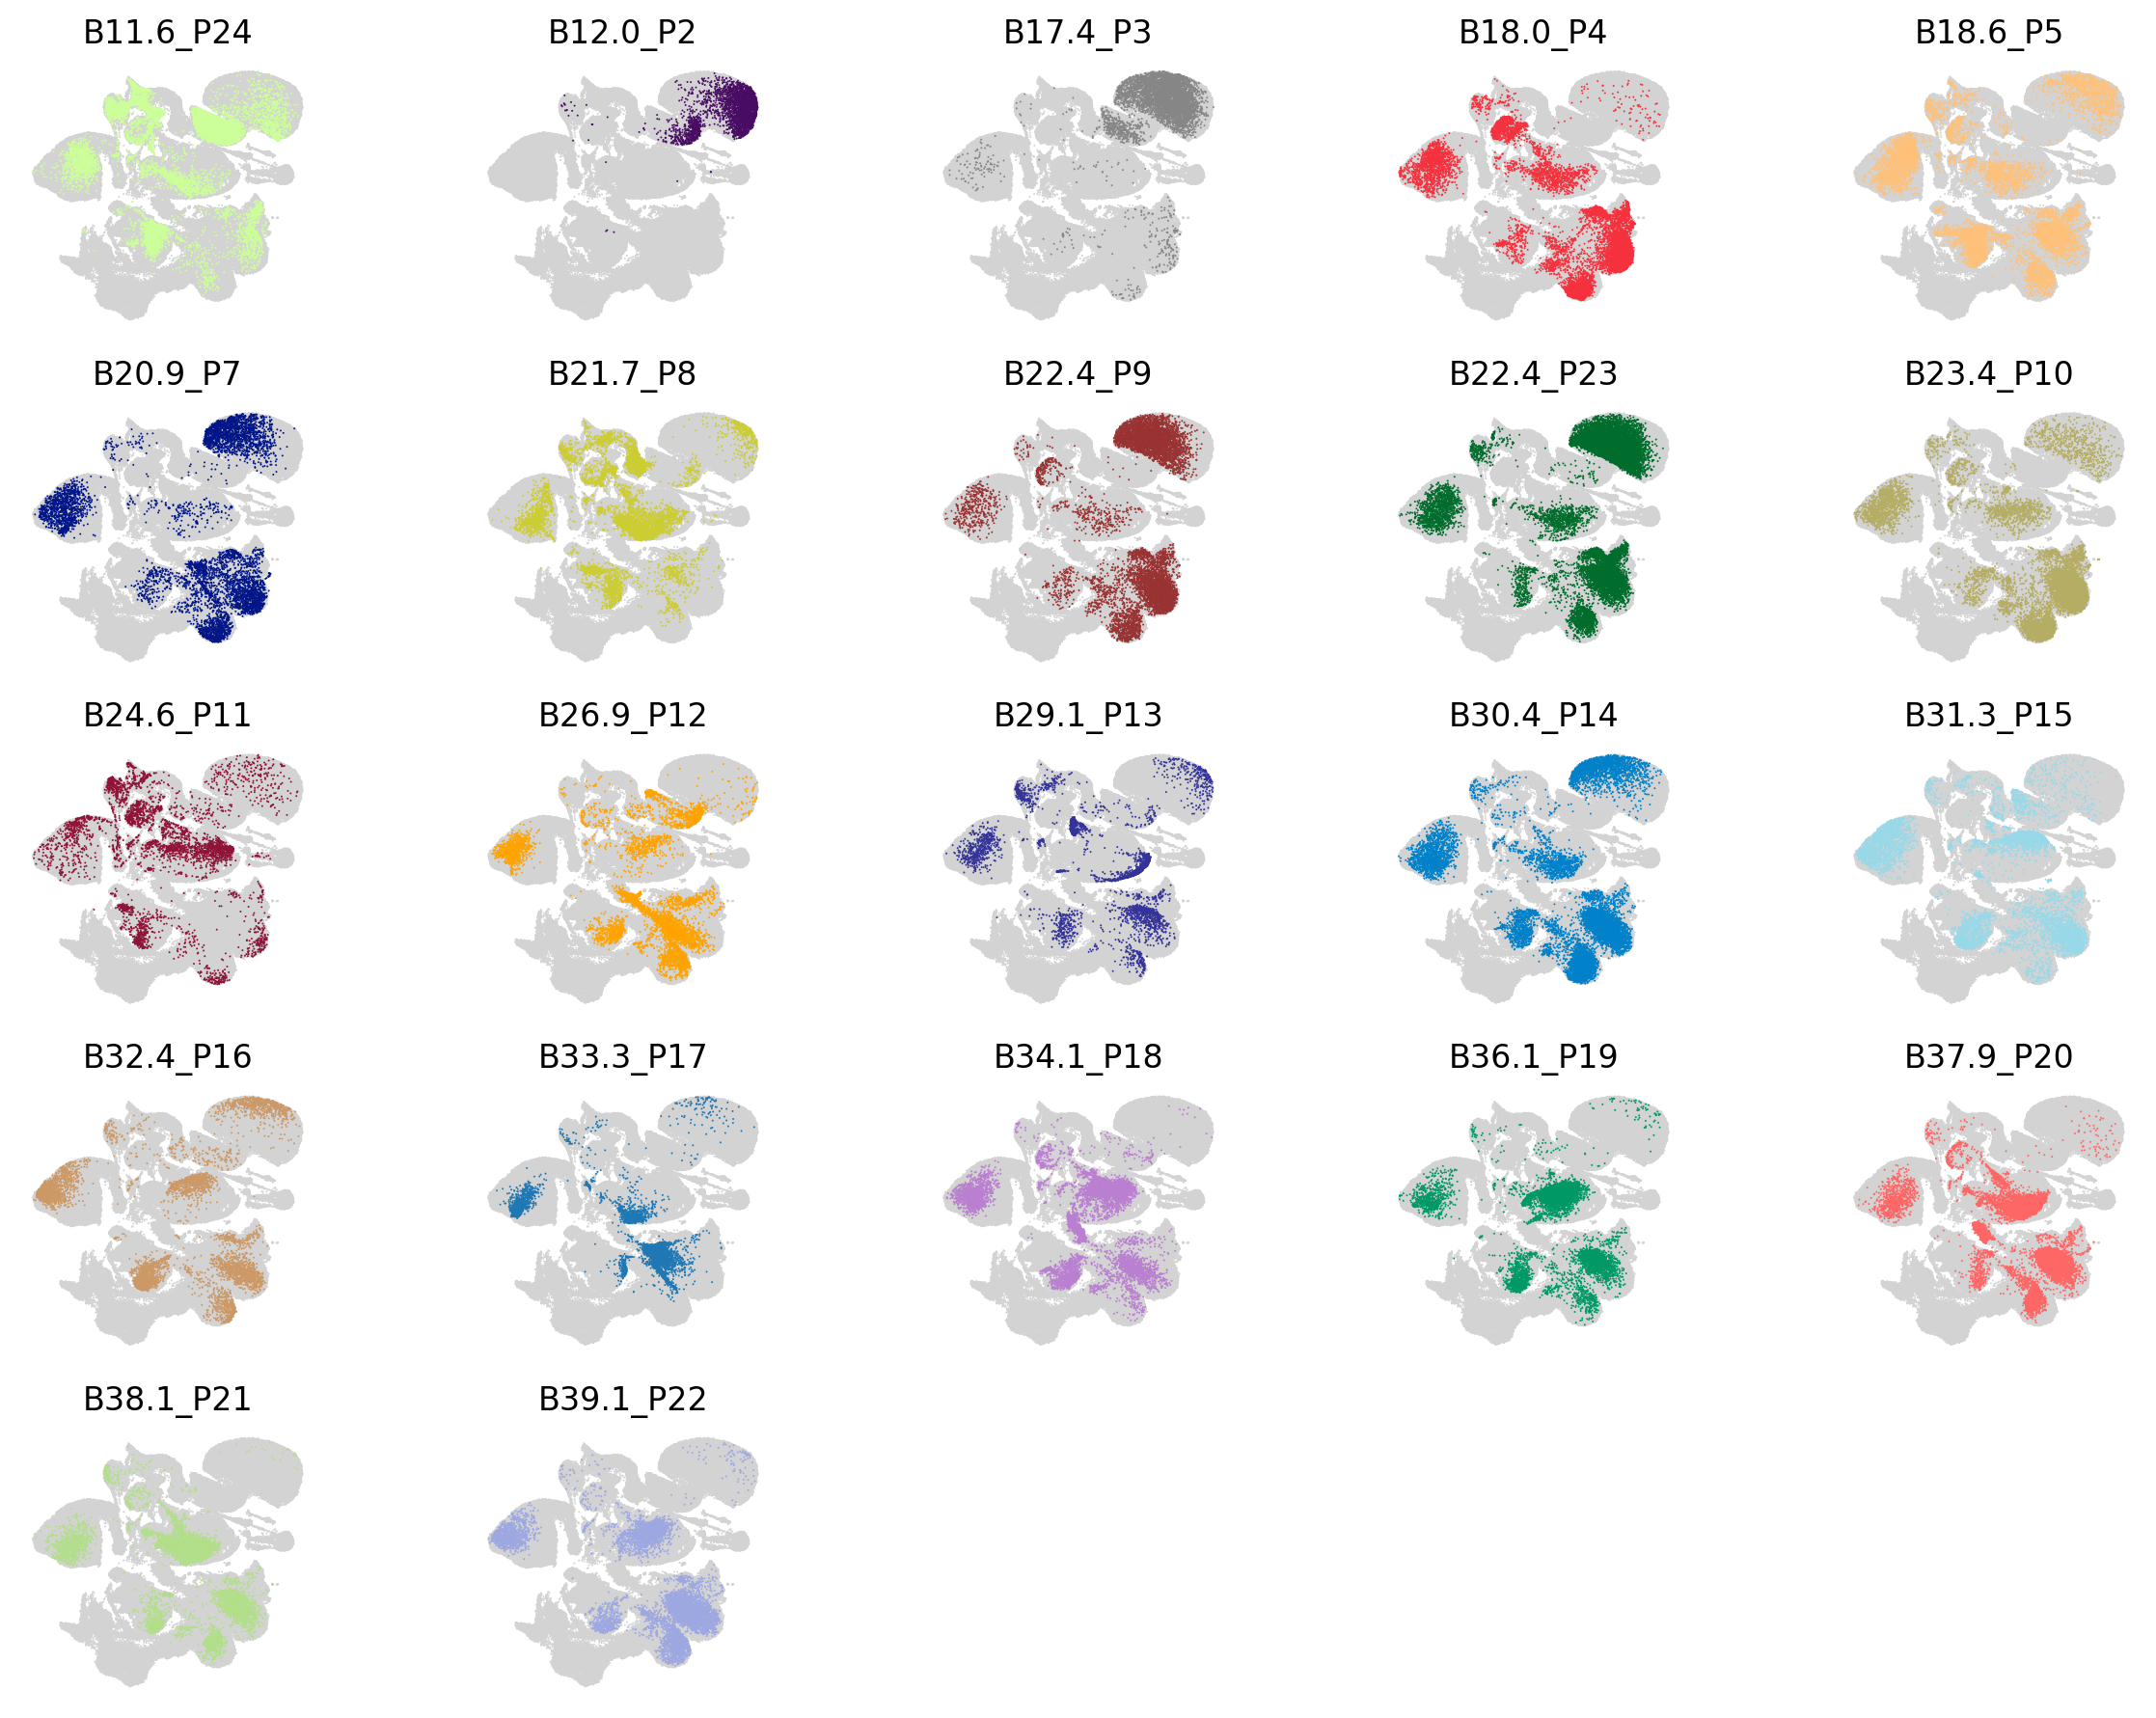

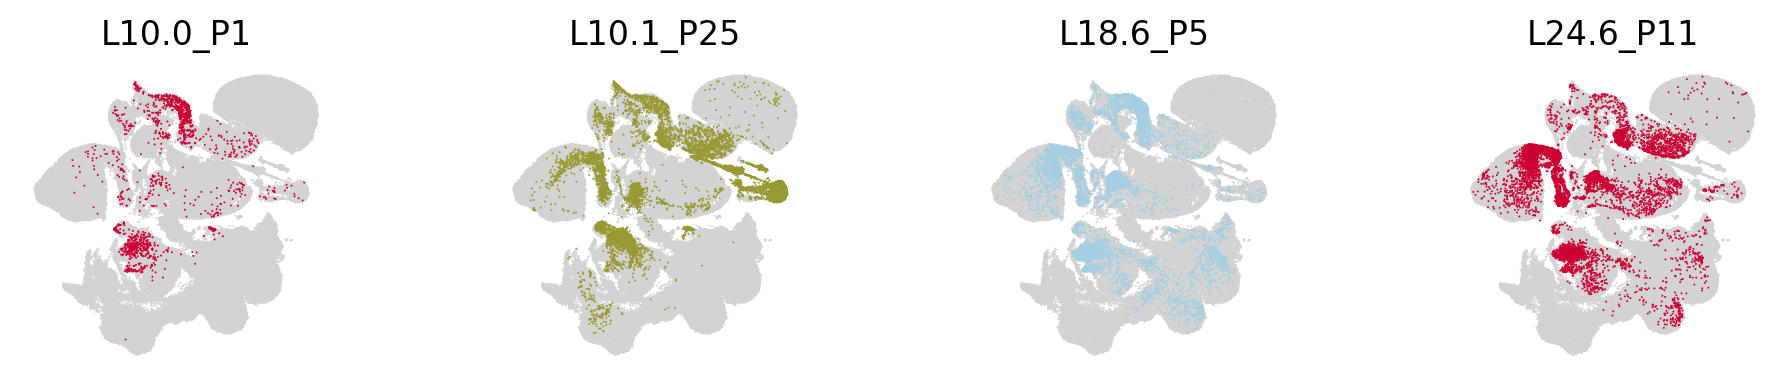

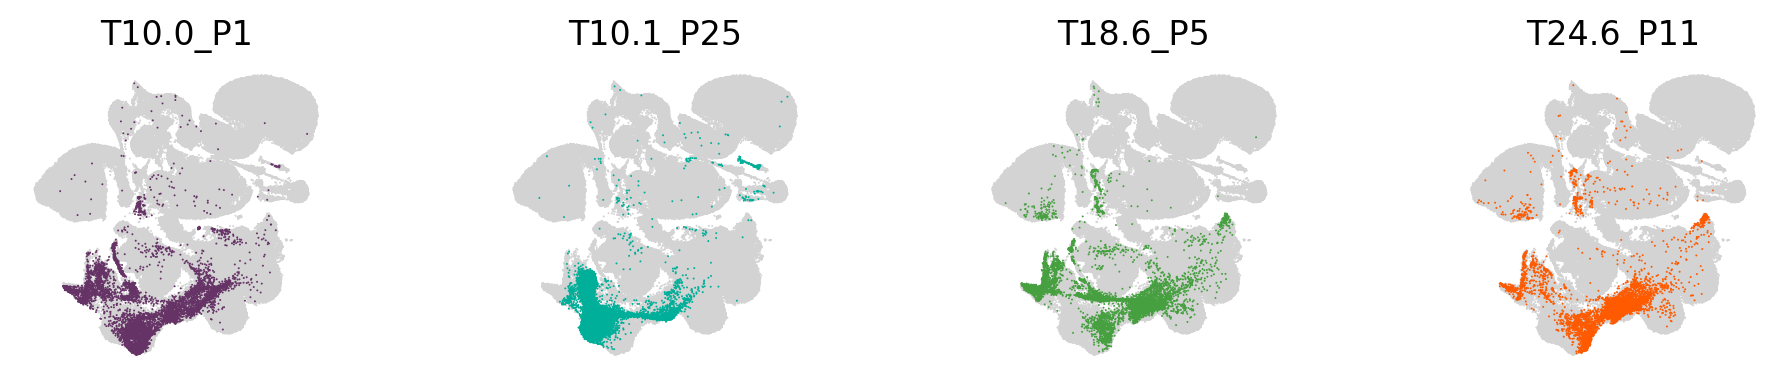

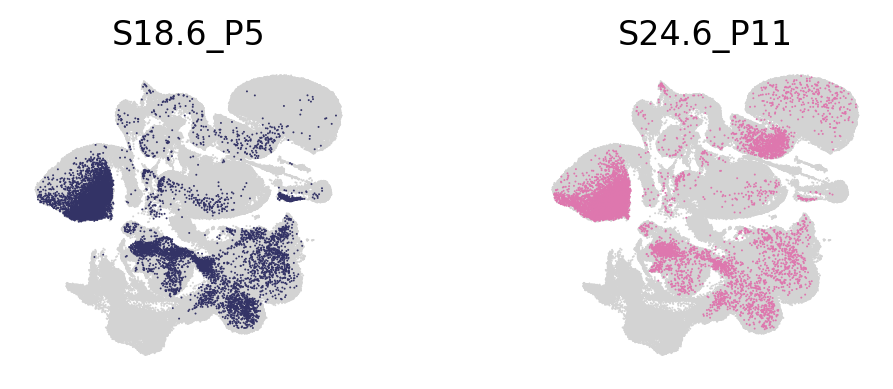

In [111]:
for u in ["B","L","T","S"]:
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = [2, 2]
    plt.rcParams['figure.dpi'] = 200
    sc.pl.umap(
        C2data,
        groups= [True],
        color=  [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith(u)],
        size=2,
        frameon=False,
        legend_loc=None,
        show=False,
            ncols=5,
    #     **kwargs
    #     save='S3_each_sample.png',  
    

    )
    plt.savefig(f'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3/UMAP_{u}.png', bbox_inches='tight')

In [ ]:
# import matplotlib.pyplot as plt
# import scanpy as sc

# # 循环遍历类别
# for u in ["B", "L", "T", "S"]:
#     plt.style.use('default')
#     plt.rcParams['figure.figsize'] = [2, 2]
#     plt.rcParams['figure.dpi'] = 200
    
#     # 生成颜色列表
#     colors = [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith(u)]
    
#     # 如果颜色列表不为空，则绘制 UMAP
#     if colors:
#         sc.pl.umap(
#             C2data,
#             color=colors,
#             size=2,
#             frameon=False,
#             legend_loc=None,
#             show=False,  # 不立即显示图表
#             ncols=5
#         )
        
#         # 保存图表到 PDF 文件
#         plt.savefig(f'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3/UMAP_{u}.png', bbox_inches='tight')
# #         plt.close()  # 关闭当前图表，避免重复显示

[<Axes: title={'center': 'L10.0_P1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'L10.1_P25'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'L18.6_P5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'L24.6_P11'}, xlabel='UMAP1', ylabel='UMAP2'>]

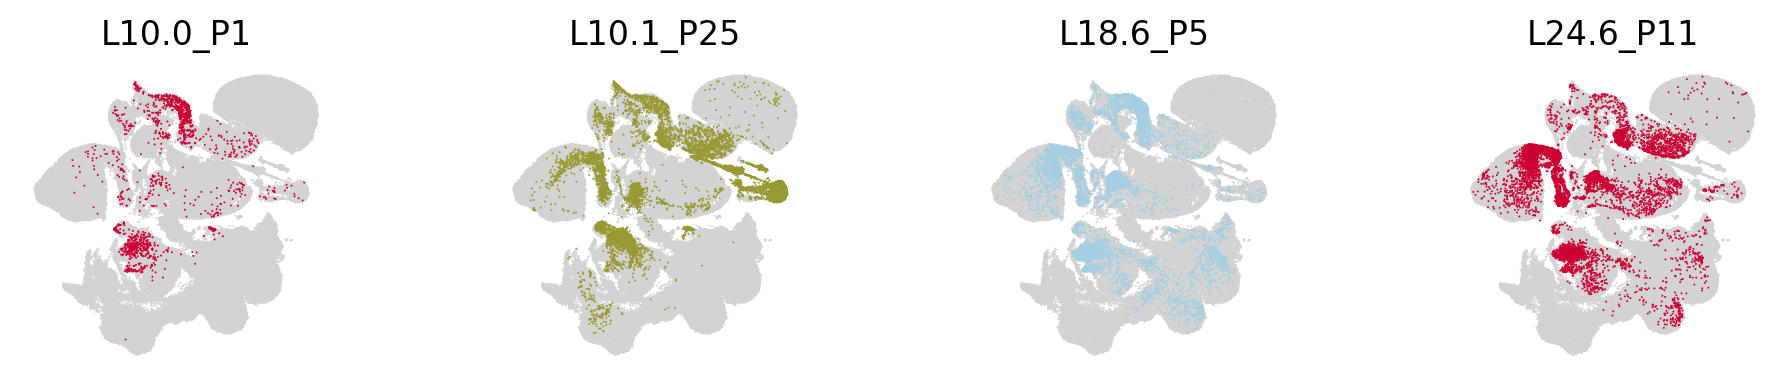

In [102]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(
    C2data,
    groups= [True],
    color=  [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith('L')],
    size=2,
    frameon=False,
    legend_loc=None,
    show=False,
        ncols=4,
#     **kwargs
#     save='S3_each_sample.png',   
)

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(
    C2data,
    groups= [True],
    color=  [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith('S')],
    size=2,
    frameon=False,
    legend_loc=None,
    show=False,
        ncols=5,
#     **kwargs
#     save='S3_each_sample.png',  

    
)

[<Axes: title={'center': 'S18.6_P5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'S24.6_P11'}, xlabel='UMAP1', ylabel='UMAP2'>]

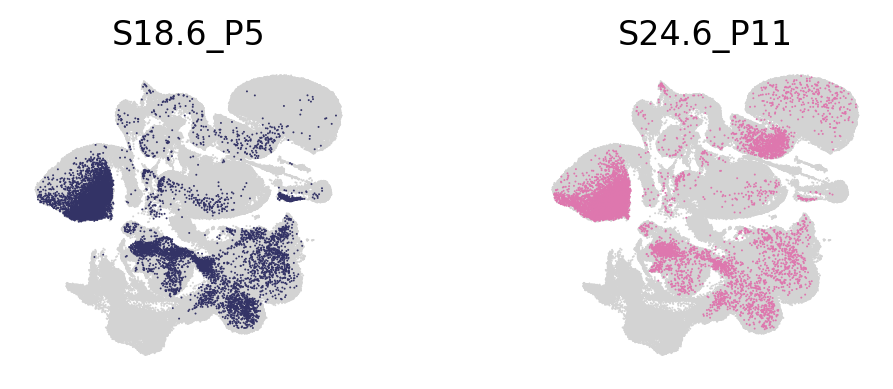

In [104]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(
    C2data,
    groups= [True],
    color=  [cat for cat in adata1.obs["AdjustedID"].cat.categories.tolist() if cat.startswith('S')],
    size=2,
    frameon=False,
    legend_loc=None,
    show=False,
        ncols=5,
#     **kwargs
#     save='S3_each_sample.png',  

)

In [68]:

# def filter_categories_by_initial(categories, initial='B'):

#     return [cat for cat in categories if isinstance(cat, str) and cat.startswith(initial)]




# def cluster_small_multiples(
#     adata, clust_key, size=60, frameon=False, legend_loc=None, FB="B",**kwargs
# ):
#     tmp = adata.copy()
#     plt.style.use('default')
#     plt.rcParams['figure.figsize'] = [1, 1]
#     plt.rcParams['figure.dpi'] = 200

#     for i, clust in enumerate(adata.obs[clust_key].cat.categories):
#         tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
#         tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
#     categories = tmp.obs[clust].cat.categories[1:].values


#     filtered_categories = filter_categories_by_initial(categories,initial=FB)
#     sc.pl.umap(
#     tmp,
#     groups=filtered_categories,
#     color=adata.obs[clust_key].cat.categories.tolist(),
#     size=size,
#     frameon=frameon,
#     legend_loc=legend_loc,
#     show=False,
#         ncols=5,
# #     save='S3_each_sample.png',  
#     **kwargs
    
# )
# #     return tmp

In [56]:
# adata1.obs["AdjustedID"].cat.categories[1:].values

array(['B12.0_P2', 'B17.4_P3', 'B18.0_P4', 'B18.6_P5', 'B20.9_P7',
       'B21.7_P8', 'B22.4_P9', 'B22.4_P23', 'B23.4_P10', 'B24.6_P11',
       'B26.9_P12', 'B29.1_P13', 'B30.4_P14', 'B31.3_P15', 'B32.4_P16',
       'B33.3_P17', 'B34.1_P18', 'B36.1_P19', 'B37.9_P20', 'B38.1_P21',
       'B39.1_P22', 'L10.0_P1', 'L10.1_P25', 'L18.6_P5', 'L24.6_P11',
       'T10.0_P1', 'T10.1_P25', 'T18.6_P5', 'T24.6_P11', 'S18.6_P5',
       'S24.6_P11'], dtype=object)

In [9]:
def create_palette(cell_types, colors):
    cell_type_colors = {}
    for i, cell_type in enumerate(cell_types):
        color = colors[i % len(colors)]
        cell_type_colors[cell_type] = color
    return cell_type_colors

colorname2=["#868686", "#B5AD64","#9DA8E2","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E"]

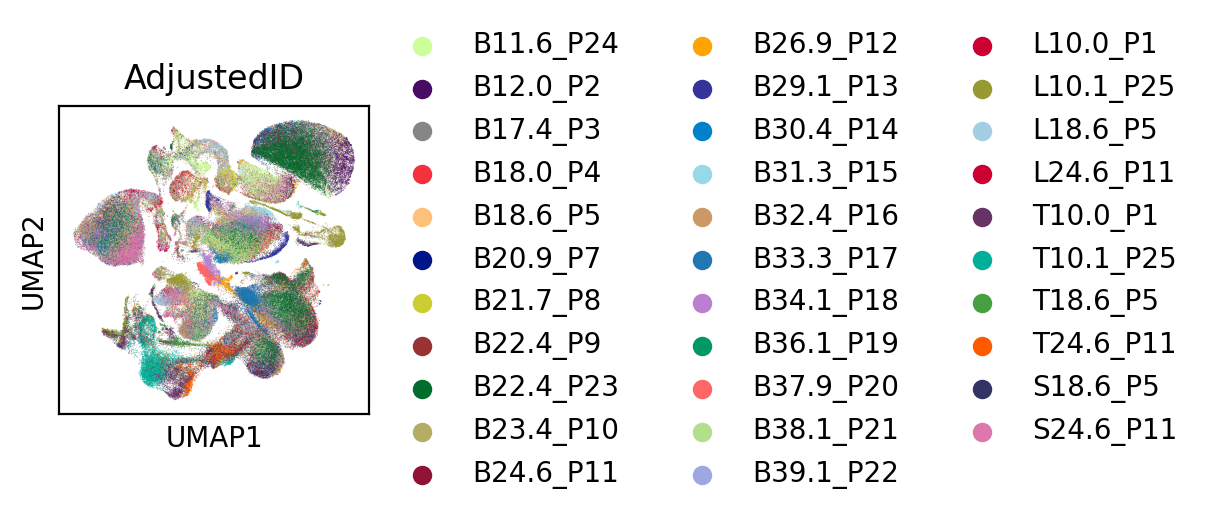

In [16]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(adata1, color = [ "AdjustedID"],palette=create_palette(adata1.obs["AdjustedID"].unique(),colorname2), alpha=0.5,legend_fontweight="normal")


In [11]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3

In [17]:
cluster_small_multiples(adata1,'AdjustedID',size=2)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")

In [23]:
adata1[adata1.obs.New_Body.isin(["PBMC"])]

View of AnnData object with n_obs × n_vars = 172432 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [32]:
# def cluster_small_multiples(
#     adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
# ):
#     tmp = adata.copy()

#     for i, clust in enumerate(adata.obs[clust_key].cat.categories):
#         tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
#         tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

#     sc.pl.umap(
#     tmp,
#     groups=tmp.obs[clust].cat.categories[1:].values,
#     color=adata.obs[clust_key].cat.categories.tolist(),
#     size=size,
#     frameon=frameon,
#     legend_loc=legend_loc,
#     show=False,
# #     save='S3_each_sample.png',  
#     **kwargs
# )

In [40]:
# cluster_small_multiples2(adata1[adata1.obs.New_Body.isin(["PBMC"])],'AdjustedID',size=2)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")

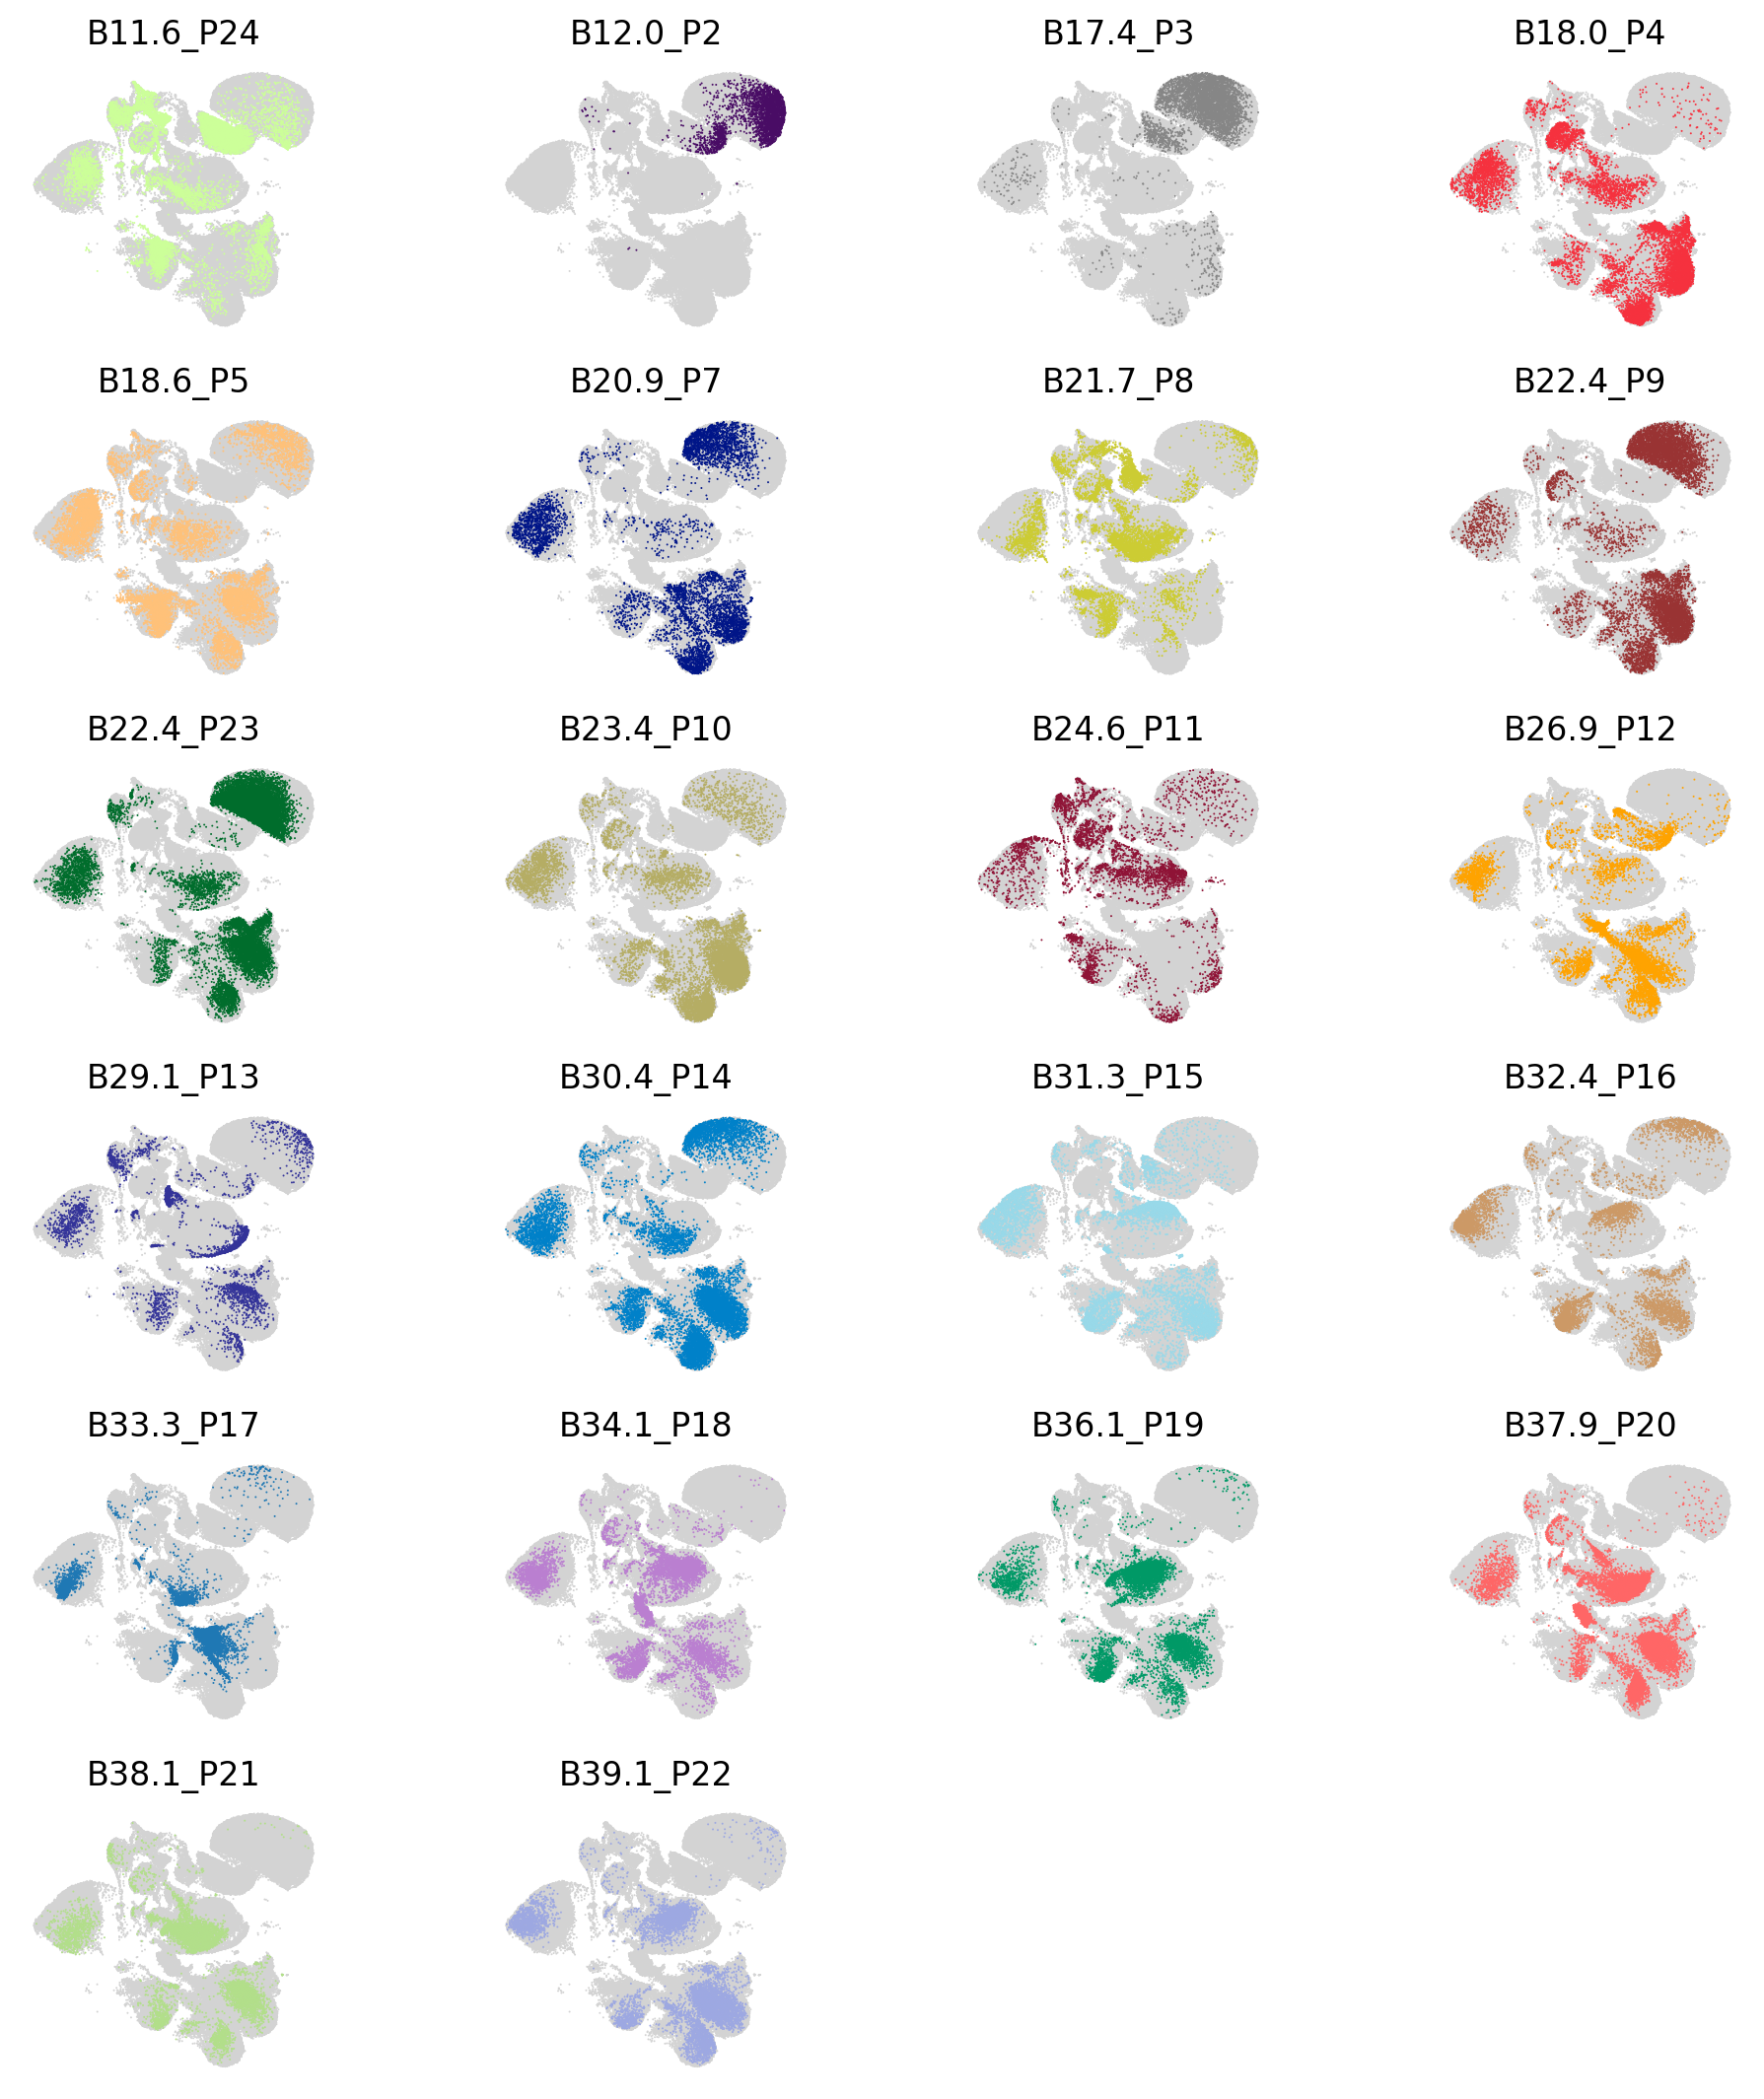

In [43]:
test=cluster_small_multiples(adata1[adata1.obs.New_Body.isin(["PBMC"])],'AdjustedID',size=2)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")

In [59]:
# help( sc.pl.umap)

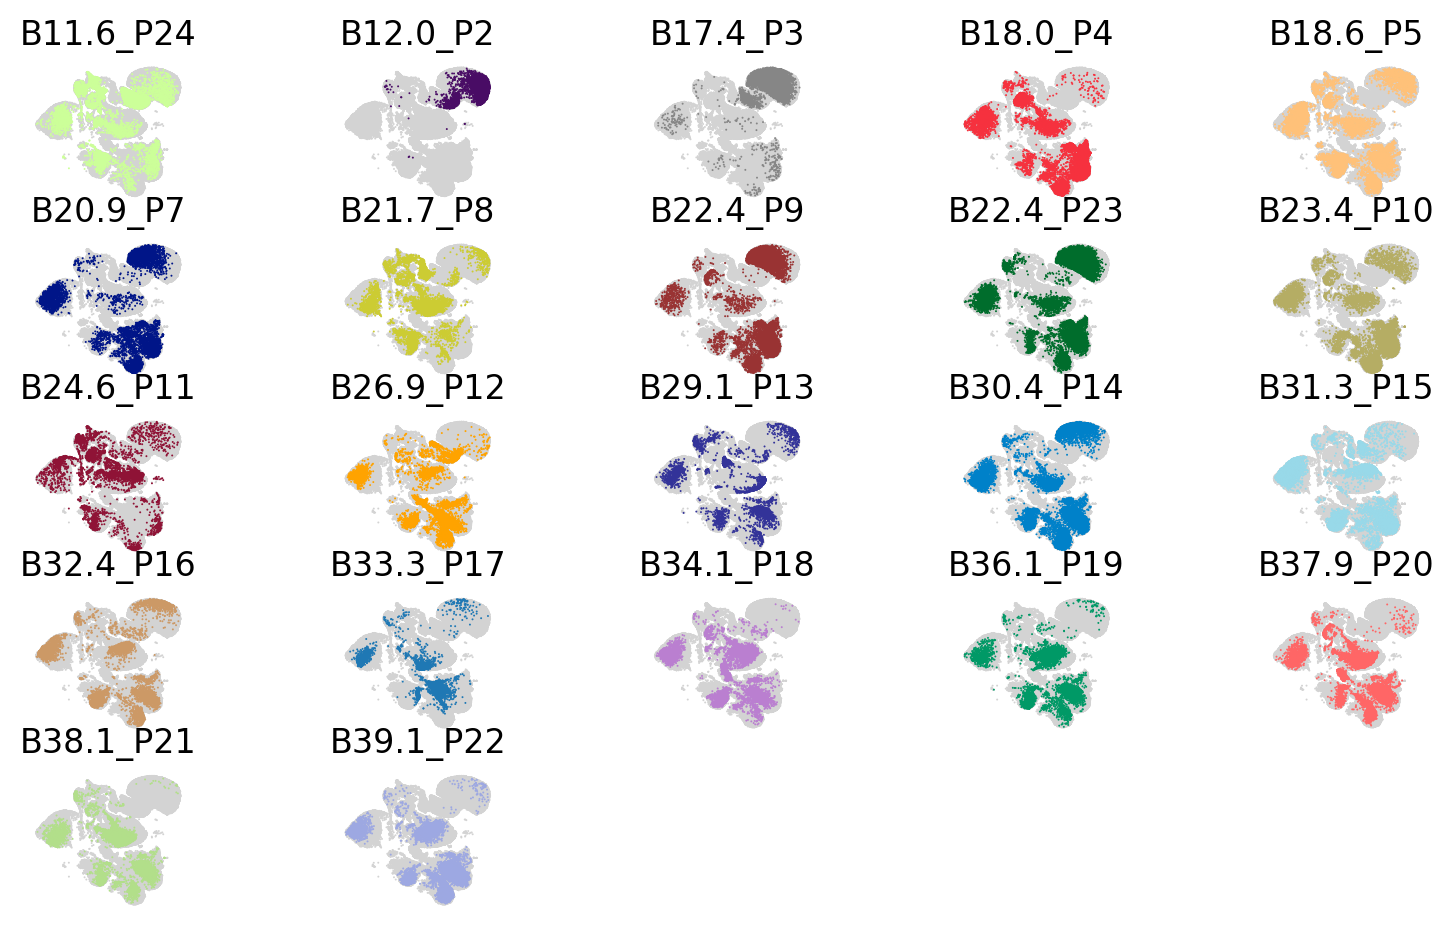

In [53]:
# cluster_small_multiples(adata1[adata1.obs.New_Body.isin(["PBMC"])],'AdjustedID',size=2)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3PBMC_each_sample.pdf", bbox_inches='tight')
# # plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")

In [69]:
# cluster_small_multiples(adata1,'AdjustedID',size=2,FB="T")
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3thymus_each_sample.pdf", bbox_inches='tight')
# # plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3_each_sample.png")


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f874c53bc10> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f867fca75e0> (for post_execute):



KeyboardInterrupt



In [13]:
# mv figures/umapS3_each_sample.png /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S3/S3_each_sample.png

In [14]:
# rm -rf figures

In [15]:
# adata1.write_h5ad("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")